In [1]:
# Import Library

import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re as regex
import re
from nltk.tokenize import TweetTokenizer
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
import nltk
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans # KMeans clustering 
import matplotlib.pyplot as plt # Python defacto plotting library
import seaborn as sns # More snazzy plotting library
%matplotlib inline 

In [2]:
# Defining file location

bbchealth = 'D:\\SEMESTER 7\\Damin\\Health-Tweets\\bbchealth.txt'
cbchealth = 'D:\\SEMESTER 7\\Damin\\Health-Tweets\\cbchealth.txt'
cnnhealth = 'D:\\SEMESTER 7\\Damin\\Health-Tweets\\cnnhealth.txt'
everydayhealth = 'D:\\SEMESTER 7\\Damin\\Health-Tweets\\everydayhealth.txt'
foxnewshealth = 'D:\\SEMESTER 7\\Damin\\Health-Tweets\\foxnewshealth.txt'
gdnhealthcare = 'D:\\SEMESTER 7\\Damin\\Health-Tweets\\gdnhealthcare.txt'
goodhealth = 'D:\\SEMESTER 7\\Damin\\Health-Tweets\\goodhealth.txt'
KaiserHealthNews = 'D:\\SEMESTER 7\\Damin\\Health-Tweets\\KaiserHealthNews.txt'
latimeshealth = 'D:\\SEMESTER 7\\Damin\\Health-Tweets\\latimeshealth.txt'
msnhealthnews = 'D:\\SEMESTER 7\\Damin\\Health-Tweets\\msnhealthnews.txt'
NBChealth = 'D:\\SEMESTER 7\\Damin\\Health-Tweets\\NBChealth.txt'
nprhealth = 'D:\\SEMESTER 7\\Damin\\Health-Tweets\\nprhealth.txt'
nytimeshealth = 'D:\\SEMESTER 7\\Damin\\Health-Tweets\\nytimeshealth.txt'
reuters_health = 'D:\\SEMESTER 7\\Damin\\Health-Tweets\\reuters_health.txt'
usnewshealth = 'D:\\SEMESTER 7\\Damin\\Health-Tweets\\usnewshealth.txt'
wsjhealth = 'D:\\SEMESTER 7\\Damin\\Health-Tweets\\wsjhealth.txt'

In [3]:
# Concate all files into 1 files named 'allaccounts'
# allaccount files was an empty files before

filenames = [bbchealth, cbchealth, cnnhealth, everydayhealth, foxnewshealth, gdnhealthcare, goodhealth, KaiserHealthNews,
            latimeshealth, msnhealthnews, NBChealth, nprhealth, nytimeshealth, reuters_health, usnewshealth, wsjhealth]
with open('D:\\SEMESTER 7\\Damin\\Health-Tweets\\allaccounts.txt', 'w', encoding = 'Latin-1') as outfile:
    for fname in filenames:
        with open(fname, encoding = 'Latin-1') as infile:
            for line in infile:
                outfile.write(line)

output adalah file 'allacounts.txt' berisi gabungan data-data tweet.

# Defining Datasets

In [4]:
# set dataframe
# Read allacounts.txt

allaccounts = pd.read_csv("D:\\SEMESTER 7\\Damin\\Health-Tweets\\allaccounts.txt", sep="|", header=None, error_bad_lines=False, encoding = 'Latin-1')

b'Skipping line 3929: expected 3 fields, saw 5\nSkipping line 4774: expected 3 fields, saw 4\nSkipping line 4832: expected 3 fields, saw 4\nSkipping line 4842: expected 3 fields, saw 4\nSkipping line 5192: expected 3 fields, saw 4\nSkipping line 5197: expected 3 fields, saw 4\nSkipping line 5221: expected 3 fields, saw 4\nSkipping line 5276: expected 3 fields, saw 4\nSkipping line 5358: expected 3 fields, saw 4\nSkipping line 5414: expected 3 fields, saw 4\nSkipping line 5638: expected 3 fields, saw 4\nSkipping line 6627: expected 3 fields, saw 4\nSkipping line 6656: expected 3 fields, saw 4\nSkipping line 6928: expected 3 fields, saw 4\nSkipping line 9091: expected 3 fields, saw 4\nSkipping line 9130: expected 3 fields, saw 4\nSkipping line 9137: expected 3 fields, saw 4\nSkipping line 9176: expected 3 fields, saw 4\nSkipping line 9216: expected 3 fields, saw 4\nSkipping line 9397: expected 3 fields, saw 4\nSkipping line 9407: expected 3 fields, saw 4\nSkipping line 9411: expected 3 f

In [5]:
# put Tweet into a list

list1 = allaccounts[2].values.tolist()

karena kami hanya memerlukan data tweet nya saja, maka yang diambil hanya kolom tweet saja, yaitu kolom ke 3

In [23]:
list1

['Breast cancer risk test devised http://bbc.in/1CimpJF',
 'GP workload harming care - BMA poll http://bbc.in/1ChTBRv',
 "Short people's 'heart risk greater' http://bbc.in/1ChTANp",
 "New approach against HIV 'promising' http://bbc.in/1E6jAjt",
 "Coalition 'undermined NHS' - doctors http://bbc.in/1CnLwK7",
 'Review of case against NHS manager http://bbc.in/1Ffj6ci',
 "VIDEO: 'All day is empty, what am I going to do?' http://bbc.in/1N7wSSz",
 "VIDEO: 'Overhaul needed' for end-of-life care http://bbc.in/1CmrRu3",
 "Care for dying 'needs overhaul' http://bbc.in/1FdSGrl",
 'VIDEO: NHS: Labour and Tory key policies http://bbc.in/1Ci5eqD',
 'Have GP services got worse? http://bbc.in/1Ci5c22',
 'A&amp;E waiting hits new worst level http://bbc.in/1Fa4Xgz',
 'Parties row over GP opening hours http://bbc.in/1CfcVOb',
 'Why strenuous runs may not be so bad after all http://bbc.in/1Ceq0Y7',
 'VIDEO: Health surcharge for non-EU patients http://bbc.in/1C5Mlbk',
 "VIDEO: Skin cancer spike 'from 60s h

In [6]:
# donwloading packages

nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Muhith\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Text Preprocessing

Data yang didapat merupakan data tweet dari berbagai agensi berita. tentu saja data tekstual tidak mungkin berkualitas. karena dataset merupakan data tekstual sehingga untuk mendapatkan data yang berkualitas, perlu dilakukan Normalization, tokenization, stopwords removal, dan stemming/lemmatization. Normalization merupakan penghilangan noise pada suatu data, beberapa contohnya adalah menghapus karakter-karakter yang tidak perlu (Hashtag : #, Mention :@Aronchia, hyperlinks : http://..., tanda baca : titik/koma/dll), Expand Contractions seperti mengubah "i've" menjadi "i have", dan menyamaratakan karakter (semua huruf kecil). stopwords removal adalah menghilangkan kata stopwords (list stopwords dapat dilihat di google). tokenization merupakan proses yang dilakukan untuk memisahkan kalimat menjadi kata-perkata. stemming/lemmatization digunakan untuk mengubah kata yang sudah diberikan imbuhan ke kata aslinya.

In [7]:
#Text Cleaning

# Removing Mentions
import re
list2=[]
for i in list1:
    list2.append(re.sub(r'@[A-Za-z0-9]+','', i))
    
# Removing Hashtags
list3=[]
for i in list2:
    list3.append(re.sub(r'#([^\s]+)', r'\1', i))
    
# Removing Hyperlinks
list4 = []
for i in list3:
    list4.append(re.sub(r'http\S+', '', i))
    
# Expanding contractions
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase
v = ' \n '.join(list4)
list5 = decontracted(v)
list6 = list5.split(" \n ")

# Removing punctuations and numbers
list7 = []
for i in list6:
    list7.append(re.sub(r"[^a-zA-Z]", ' ', i))
    
# Upper Case to Lower Case
list8 =[x.lower() for x in list7]
list8

# Tokenization
tknzr = TweetTokenizer()
alltokens = []
for i in list8:
    tokens = tknzr.tokenize(i)
    alltokens.append(tokens)
alltokens

#Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()
lemmatize_tweets = []
for i in alltokens:
    lemmatize_words = []
    for j in i:
        lemmatized = wordnet_lemmatizer.lemmatize(j)
        lemmatize_words.append(lemmatized)
    lemmatize_tweets.append(lemmatize_words)
lemmatize_tweets

# Joining Tweets
processed_tweets = []
for i in lemmatize_tweets:
    joined_tweets = ' '.join(map(str, i))
    processed_tweets.append(joined_tweets)
processed_tweets

['breast cancer risk test devised',
 'gp workload harming care bma poll',
 'short people is heart risk greater',
 'new approach against hiv promising',
 'coalition undermined nh doctor',
 'review of case against nh manager',
 'video all day is empty what am i going to do',
 'video overhaul needed for end of life care',
 'care for dying need overhaul',
 'video nh labour and tory key policy',
 'have gp service got worse',
 'a amp e waiting hit new worst level',
 'party row over gp opening hour',
 'why strenuous run may not be so bad after all',
 'video health surcharge for non eu patient',
 'video skin cancer spike from s holiday',
 'amight die in future outbreak',
 'skin cancer linked to holiday boom',
 'public back tax rise to fund nh',
 'video welcome to the designer asylum',
 'video why are we having le sex',
 'five idea to transform the nh',
 'personal cancer vaccine exciting',
 'child heart surgery death halved',
 'video miliband cameron failed the nh',
 'unsafe food growing global

# Features Extraction using TF-IDF

TF-IDF merupakan suatu cara dalam menentukan bobot hubungan suatu kata (term) terhadap dokumen. Terdapat 2 konsep dalam perhitungan TF-IDF, yaitu perhitungan tf dan idf. Term Frequency (Tf) adalah frekuensi kemunculan kata di dalam sebuah dokumen dan inverse document frequency (idf) adalah inverse frekuensi dokumen yang mengandung kata tersebut. Secara sederhana TF-IDF digunakan untuk mengetahui seberapa sering sebuah kata muncul didalam dokumen. Namun, dalam menentukan bobot hubungan suatu kata dalam dokumen, TF-IDF memperhatikan seberapa penting kata tersebut dalam dokumen dan seberapa umum kata tersebut digunakan di berbagai dokumen. Tf dengan bobot nilai memiliki hubungan positif, dengan kata lain semakin sering kata tersebut muncul maka bobot kata tersebut akan semakin besar.

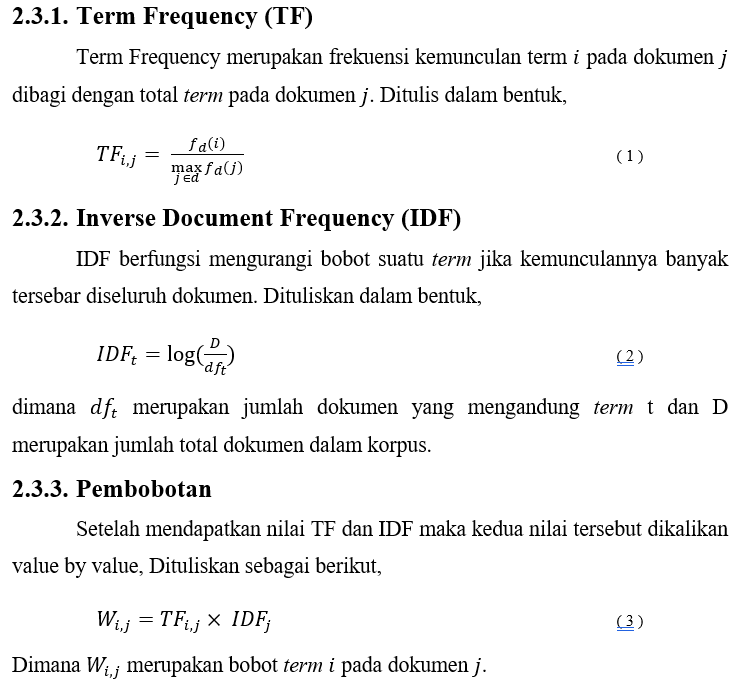

kami menggunakan tools tfidfvectorizer yang disediakan oleh sklearn.feature_extraction.text

In [8]:
# define vector 

foovec = TfidfVectorizer(min_df = 5, max_df = 0.99, tokenizer=nltk.word_tokenize, ngram_range = (1,1), stop_words = 'english', max_features = 1000)

disini kami membatasi jenis kata sebanyak 1000, dan dilakukan stopwords removal

In [9]:
# Downloading packages

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Muhith\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [10]:
# train tweets 

processed_tweets_tfidf = foovec.fit_transform(processed_tweets)
processed_tweets_tfidf.shape

(62813, 1000)

In [11]:
# Tweets Number

x = foovec.vocabulary_
x

{'breast': 104,
 'cancer': 121,
 'risk': 740,
 'test': 880,
 'gp': 360,
 'care': 123,
 'poll': 654,
 'short': 783,
 'people': 625,
 'heart': 392,
 'new': 576,
 'approach': 45,
 'hiv': 402,
 'nh': 579,
 'doctor': 233,
 'review': 735,
 'case': 125,
 'video': 945,
 'day': 200,
 'going': 355,
 'needed': 574,
 'end': 266,
 'life': 478,
 'dying': 248,
 'need': 573,
 'key': 443,
 'policy': 652,
 'service': 775,
 'got': 358,
 'worse': 989,
 'amp': 36,
 'e': 249,
 'waiting': 956,
 'hit': 401,
 'worst': 990,
 'level': 476,
 'party': 619,
 'hour': 410,
 'run': 747,
 'bad': 68,
 'health': 384,
 'patient': 620,
 'skin': 792,
 's': 750,
 'holiday': 404,
 'die': 219,
 'future': 338,
 'outbreak': 609,
 'linked': 486,
 'public': 692,
 'tax': 873,
 'rise': 738,
 'fund': 336,
 'welcome': 975,
 'having': 381,
 'le': 465,
 'sex': 777,
 'idea': 418,
 'vaccine': 938,
 'child': 141,
 'surgery': 854,
 'death': 205,
 'food': 324,
 'growing': 365,
 'global': 352,
 'threat': 893,
 'progress': 683,
 'fast': 300,
 

In [12]:
# Sort the tweets

import operator
sorted_x = sorted(x.items(), key=operator.itemgetter(1))
sorted_x

[('ab', 0),
 ('abortion', 1),
 ('abuse', 2),
 ('aca', 3),
 ('access', 4),
 ('act', 5),
 ('action', 6),
 ('active', 7),
 ('activity', 8),
 ('actually', 9),
 ('ad', 10),
 ('add', 11),
 ('addiction', 12),
 ('adhd', 13),
 ('administration', 14),
 ('adult', 15),
 ('advice', 16),
 ('affect', 17),
 ('affordable', 18),
 ('africa', 19),
 ('african', 20),
 ('age', 21),
 ('agency', 22),
 ('aging', 23),
 ('ahead', 24),
 ('aid', 25),
 ('aim', 26),
 ('air', 27),
 ('alcohol', 28),
 ('allergy', 29),
 ('alternative', 30),
 ('alzheimer', 31),
 ('amazing', 32),
 ('america', 33),
 ('american', 34),
 ('amid', 35),
 ('amp', 36),
 ('animal', 37),
 ('answer', 38),
 ('anti', 39),
 ('antibiotic', 40),
 ('anxiety', 41),
 ('app', 42),
 ('appeal', 43),
 ('apple', 44),
 ('approach', 45),
 ('approval', 46),
 ('approves', 47),
 ('apps', 48),
 ('area', 49),
 ('arm', 50),
 ('arthritis', 51),
 ('article', 52),
 ('ask', 53),
 ('asked', 54),
 ('asks', 55),
 ('asthma', 56),
 ('athlete', 57),
 ('attack', 58),
 ('attention',

In [13]:
# put sorted tweets into a list

new_list=[]
for i in range(len(sorted_x)):
    new_list.append(sorted_x[i][0])
new_list

['ab',
 'abortion',
 'abuse',
 'aca',
 'access',
 'act',
 'action',
 'active',
 'activity',
 'actually',
 'ad',
 'add',
 'addiction',
 'adhd',
 'administration',
 'adult',
 'advice',
 'affect',
 'affordable',
 'africa',
 'african',
 'age',
 'agency',
 'aging',
 'ahead',
 'aid',
 'aim',
 'air',
 'alcohol',
 'allergy',
 'alternative',
 'alzheimer',
 'amazing',
 'america',
 'american',
 'amid',
 'amp',
 'animal',
 'answer',
 'anti',
 'antibiotic',
 'anxiety',
 'app',
 'appeal',
 'apple',
 'approach',
 'approval',
 'approves',
 'apps',
 'area',
 'arm',
 'arthritis',
 'article',
 'ask',
 'asked',
 'asks',
 'asthma',
 'athlete',
 'attack',
 'attention',
 'audio',
 'aug',
 'autism',
 'avoid',
 'away',
 'b',
 'baby',
 'bacteria',
 'bad',
 'ban',
 'based',
 'battle',
 'bean',
 'beat',
 'beauty',
 'bed',
 'begin',
 'behavior',
 'belly',
 'benefit',
 'best',
 'better',
 'big',
 'biggest',
 'billion',
 'bird',
 'birth',
 'black',
 'blame',
 'blog',
 'blood',
 'blue',
 'board',
 'body',
 'bone',
 '

In [14]:
# Make a .csv file as a place to save the tf-idf score for each word

f2=(open(r'D:\\SEMESTER 7\\Damin\\Health-Tweets\\tfidfvectors.csv', 'w', newline=''))
writer = csv.writer(f2)
header_row = new_list
writer.writerow(header_row)
p = processed_tweets_tfidf.toarray()
for i in range(len(p)):
    writer.writerow(p[i])

In [15]:
# read the scored dataset that has been saved in a .csv file

df = pd.read_csv('D:\\SEMESTER 7\\Damin\\Health-Tweets\\tfidfvectors.csv', encoding = "ISO-8859-1")
df.head()

,ab,abortion,abuse,aca,access,act,action,active,activity,actually,...,worst,worth,wrong,year,yes,yoga,york,young,younger,youth
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Scalling with StandardScaler

In [16]:
# Scale the dataset for a better data distribution

X = df.iloc[:,0:999]
X = StandardScaler().fit_transform(X)

# Dimention Reduction using PCA

karena feature yang dimiliki oleh dataset sangat banyak, yaitu sebanyak 1000 jenis features, maka kami perlu mereduksi dimensi sehingga dapat dilakukan klastering.

In [17]:
# Train PCA with 90% of datasets trained

pca = PCA(0.90)
pca.fit(X)
pca.n_components_

431

setelah dilakukan reduksi dimensi, masih terdapat sebanyak 431 komponen. Ini masih terbilang cukup banyak untuk dilakukan klastering. maka kami membatasi hanya sebanyak 2 komponen saja.

In [29]:
# We define only 5 components PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
pca.explained_variance_ratio_

array([0.003862  , 0.00377559])

In [30]:
# datasets after PCA

principalDf = pd.DataFrame(data = principalComponents)
principalDf.head()

,0,1
0,0.273637,-1.239786
1,-0.887286,1.222685
2,0.598481,-0.097237
3,-0.920236,-0.612111
4,-0.456399,-0.261077


# Clustering with K-Means

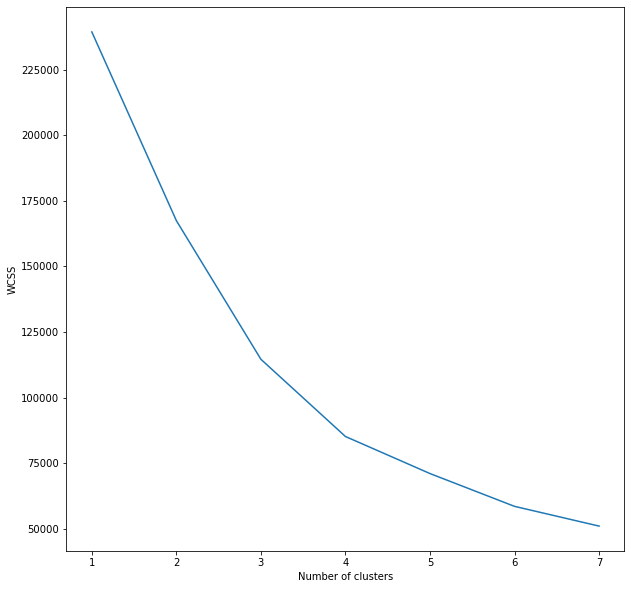

In [37]:
# finding best n clusters using elbow method

wcss = []
for i in range(1,8):
   model = KMeans(n_clusters = i, init = "k-means++")
   model.fit(principalDf)
   wcss.append(model.inertia_)
plt.figure(figsize=(10,10))
plt.plot(range(1,8), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

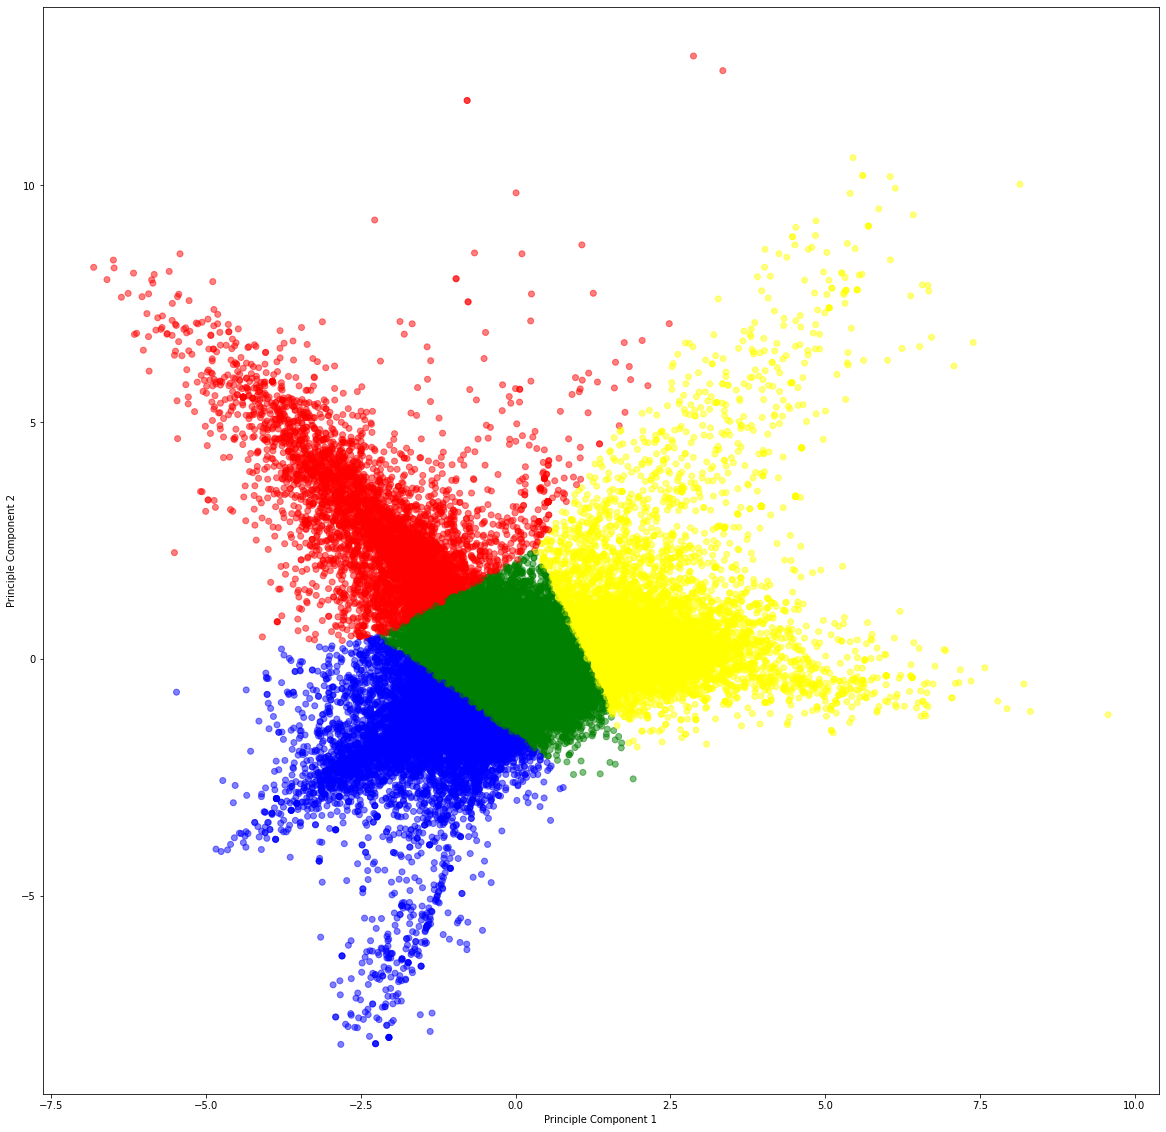

In [34]:
kmeans = KMeans(n_clusters = 4)
#Compute cluster centers and predict cluster indices
X_clustered = kmeans.fit_predict(principalComponents)

#Define our own color map
LABEL_COLOR_MAP = {0:'red', 1: 'green', 2: 'blue' , 3:'yellow', 4: 'violet' , 5: 'black', 6:'darkorange', 7: 'olive', 
                  8: 'chocolate', 9:'magenta', 10: 'maroon', 11: 'cyan', 12:'khaki', 13: 'grey', 14: 'wheat', 15: 'red'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

# Plot the scatter diagram
plt.figure(figsize = (20,20))
plt.scatter(principalComponents[:,0],principalComponents[:,1], c= label_color, alpha=0.5) 
plt.xlabel('Principle Component 1')
plt.ylabel('Principle Component 2')
plt.show()